In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display
import ipywidgets as w
from IPython.display import Javascript

<h1 align="center">Analysis of ES trades</h1>
<p>* Please ignore all the code and read all the text / code output and graphs</p>
<p>* <b>Before you do anything click Cell > Run All to start the notebook and scroll back up</b></p>
<p>* This notebook contains analysis on profits, percentages, time (weekly, daily... trades)</p>
<p>* We have 4 main categories, <b>Scalp, Swing, Long, Short</b>. They are all turned on by default, and they influence what data the analysis is done on.</p>
<p>* If you select e.g. Scalp + Long + Short, all Long trades will not be taken into consideration while performing calculations.</p>
<p>* After you make any change to the category, all cells will automatically be recalculated, which can take a few seconds.</p>
<p>* Generally, most analysis is based on trade exit date except 4th section - Statistics based on time, where it's based on entry date of the trade</p>

In [213]:
is_scalp = w.Checkbox(value=True, description='Scalp', indent=True)
is_swing = w.Checkbox(value=True, description='Swing', indent=True)
is_long = w.Checkbox(value=True, description='Long', indent=True)
is_short = w.Checkbox(value=True, description='Short', indent=True)

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

is_scalp.observe(run_all)
is_swing.observe(run_all)
is_long.observe(run_all)
is_short.observe(run_all)
print('   CATEGORIES TO SELECT FROM:')
display(is_scalp)
display(is_swing)
display(is_long)
display(is_short)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

   CATEGORIES TO SELECT FROM:


Checkbox(value=True, description='Scalp')

Checkbox(value=True, description='Swing')

Checkbox(value=True, description='Long')

Checkbox(value=True, description='Short')

<h1 align="center">Table of content:</h1>
<h2>0. Data configuration - can be generally ignored</h2>
<h2>1. Visualizations of profits</h2>
<p>* This section consists of displaying/plotting cumulative performances</p>
1.1 Plot of performance of your selected categories<br />
1.2 Plot of Scalp vs Swing strategies/profits<br />
1.3 Plot of Long vs Short strategies/profits<br />
<h2>2. Statistics based on overall trades</h2>
<p>* Numerical statistics of trades like point gains, averages, %...</p>
2.1 win/loss % - percentage of profitable trades, breakeven trades, losing trades (from selected categories)<br />
2.2 avg point gain of trades - mean, std of trades<br />
2.3 avg win/loss of points when winning/losing trade - when trade is profitable, how many points do we gain on avg...<br />
<h2>3. Extremes</h2>
<p>* What are the best, worst trades? When did they happen? What can we learn from them?</p>
3.1 Scatter plot for all trades (point gains) - great for identifying best/worst trades and general understanding<br />
3.2 Table of 10 best trades (biggest gain)<br />
3.3 Table of 10 worst trades (biggest loss)<br />
<h2>4. Statistics based on time</h2>
<p>* Analysis of yearly, monthly, every Mondays... Contains 3 tables on each category. Overall gain of points, average gain of points per trade and % of winning trades per certain time period<br />
* Answers questions like: If I enter a trade at 10am, am I more profitable in general than at 3pm?</p>
4.1 Yearly - 2022, 2021, 2020...<br />
4.2 Monthly - Jan, Feb, Mar...<br />
4.3 Weekly - Mon, Tue, Wed...<br />
4.4 Daily - 1., 5., 22. ...<br />
4.5 Hourly - 9am, 10am, 3pm...<br />

<h2>0. Setup of the table for statistical analysis of scalps</h2>

drop useless columns<br />
filter wrong symbols (GOLD [1 instance] & RTY [2 instances])<br />
sort by date<br />
calculate profit on each trade<br />

In [214]:
scalp = is_scalp.value
swing = is_swing.value
long = is_long.value
short = is_short.value


df = pd.read_csv('merged_trades.csv')
df = df.drop('Unnamed: 0', axis=1)
df['time_entry'] = pd.to_datetime(df['time_entry'])
df['time_exit'] = pd.to_datetime(df['time_exit'])
df = df[~df['symbol_exit'].isin(['RTY', 'GOLD'])].reset_index(drop=True)  # remove non ES trades
df = df.sort_values(by='time_exit').reset_index(drop=True)
df = df.set_index('time_exit')
def calc_profit(entry_price, exit_price, _type):
    if _type == 'short':
        return entry_price - exit_price
    elif _type == 'long':
        return exit_price - entry_price
    
    else:
        exit()
    

df['profit'] = np.vectorize(calc_profit)(df['entry_price'], df['exit_price'], df['type'])

df_scalp = df[df['timeframe'] == 'scalp']
df_swing = df[df['timeframe'] == 'swing']
df_short = df[df['type'] == 'short']
df_long = df[df['type'] == 'long']

if not swing:
    df = df[df['timeframe'] == 'swing']
if not scalp:
    df = df[df['timeframe'] == 'swing'] 
if not short:
    df = df[df['type'] == 'long']
if not long:
    df = df[df['type'] == 'short']
df['profit_cumsum'] = df['profit'].cumsum()
df['is_profit'] = df['profit'].apply(lambda x: 1 if x > 0 else 0)
df = df.sort_values(by='time_exit')

<h1>Visualizations of cumulative profits:</h1>
<p>* Displaying/plotting cumulative performances</p>

<b>1.1</b> Plot of performance of your selected categories

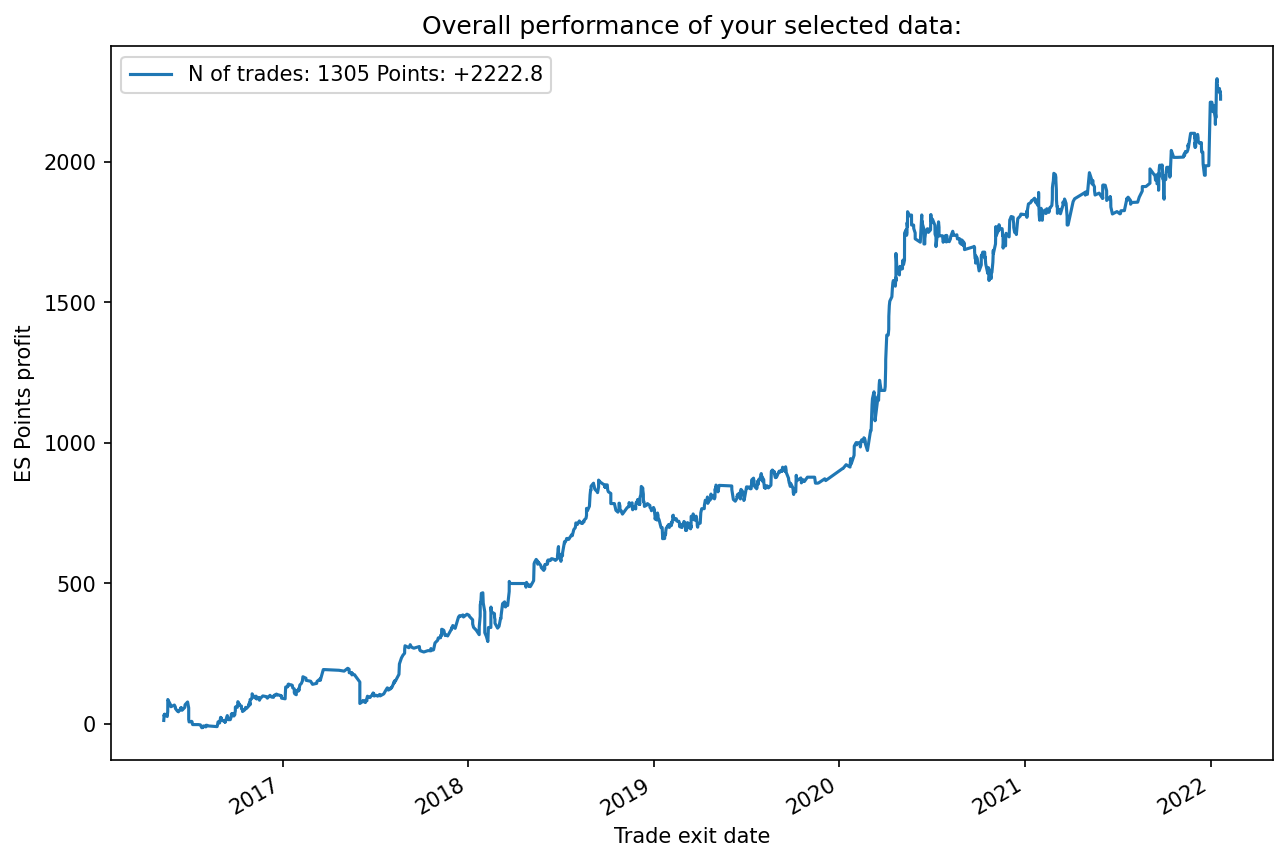

In [215]:
# plotting of YOUR data
fig, ax = plt.subplots(figsize=(10, 7), dpi=150)
df['profit_cumsum'].plot(ax=ax, label=f'N of trades: {len(df)} Points: +{round(df["profit"].sum(), 1)}')
plt.xlabel('Trade exit date')
plt.ylabel('ES Points profit')
plt.title("Overall performance of your selected data:")
plt.legend();

<p><b>1.2 Plot of Scalp vs Swing strategies/profits</b></br>
<b>1.3 Plot of Long vs Short strategies/profits</b></br></p>
<p><b>! These graphs stay the same no matter what category you choose</b></p>

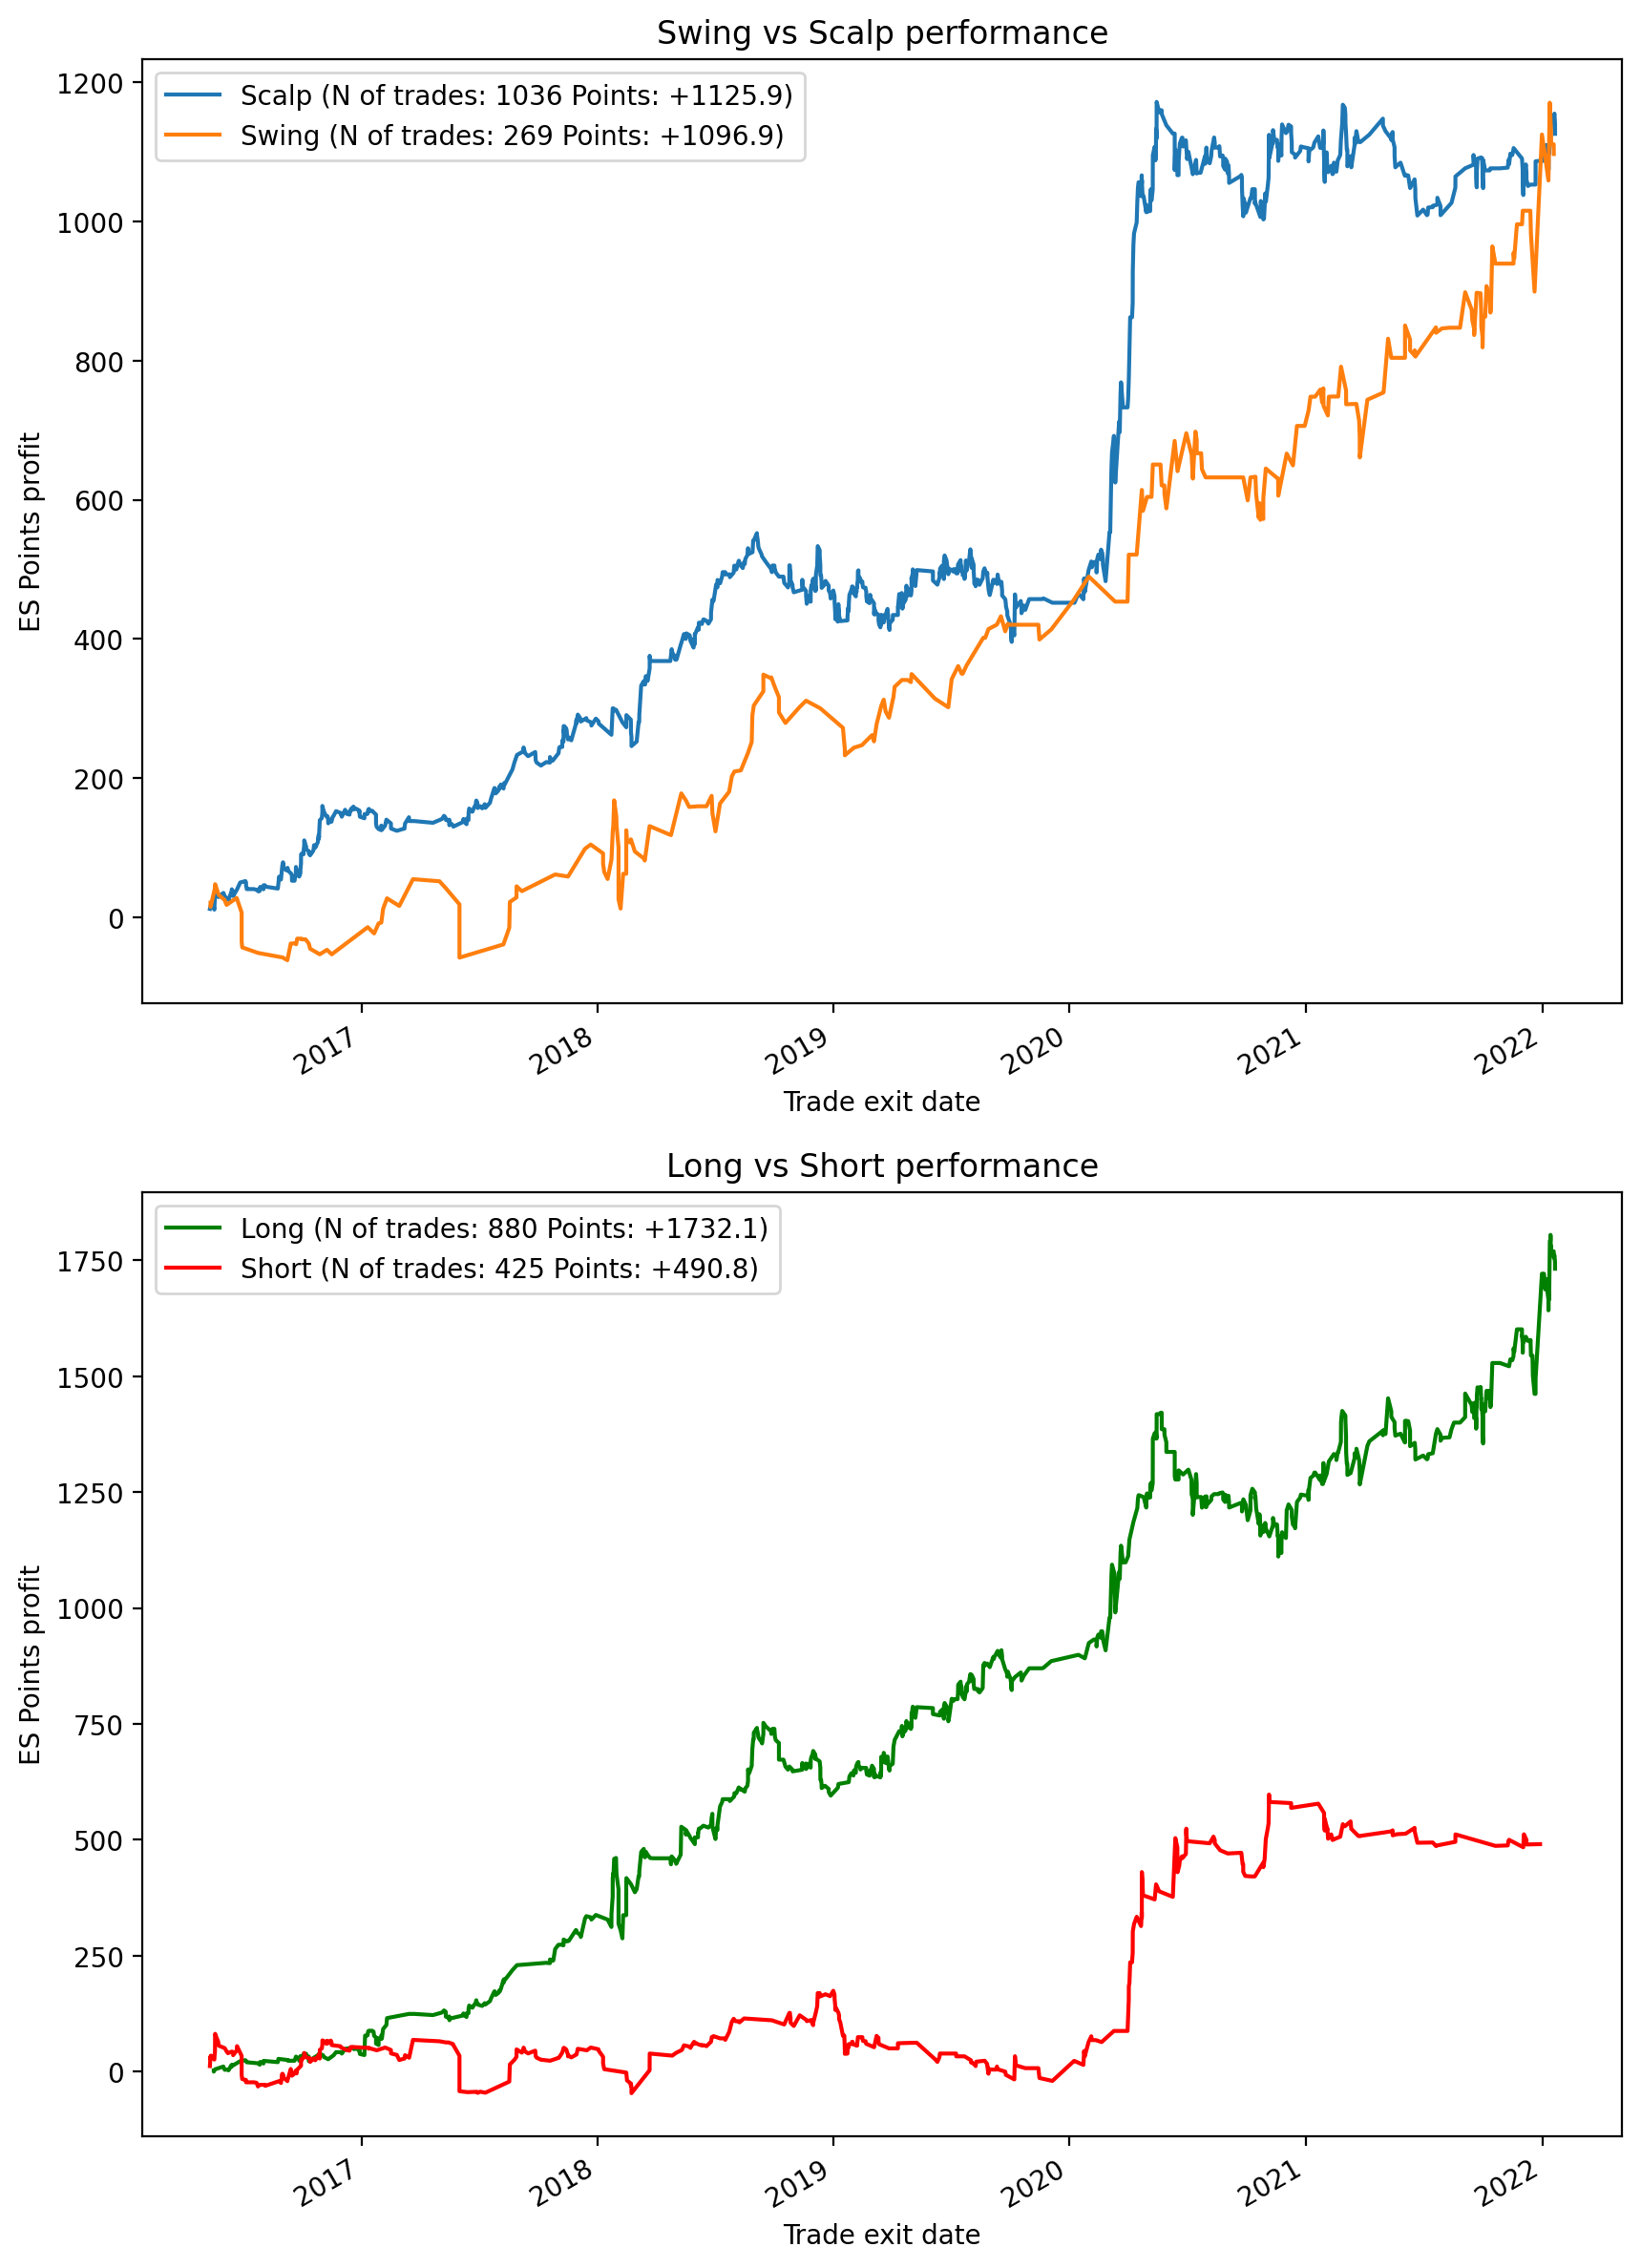

In [216]:
# plotting of scalp + swing overall
fig, ax = plt.subplots(nrows=2, figsize=(10, 16), dpi=200)
df_scalp['profit'].cumsum().plot(ax=ax[0], label=f'Scalp (N of trades: {len(df_scalp)} Points: +{round(df_scalp["profit"].sum(), 1)})')
df_swing['profit'].cumsum().plot(ax=ax[0], label=f'Swing (N of trades: {len(df_swing)} Points: +{round(df_swing["profit"].sum(), 1)})')
df_long['profit'].cumsum().plot(ax=ax[1], c='green', label=f'Long (N of trades: {len(df_long)} Points: +{round(df_long["profit"].sum(), 1)})')
df_short['profit'].cumsum().plot(ax=ax[1], c='red', label=f'Short (N of trades: {len(df_short)} Points: +{round(df_short["profit"].sum(), 1)})')
#plt.xlabel('Trade exit date')
ax[0].set_xlabel('Trade exit date'); ax[1].set_xlabel('Trade exit date')
ax[0].set_ylabel('ES Points profit'); ax[1].set_ylabel('ES Points profit')
#plt.ylabel('ES Points profit')
ax[0].set_title('Swing vs Scalp performance')
ax[1].set_title('Long vs Short performance')
ax[0].legend();ax[1].legend();

<h2>Statistics based on overall trades</h2>
<p>* Numerical statistics of trades like point gains, averages, %... (use categories above for more detailed inspection)</p>
<p><b>2.1 win/loss %</b> - percentage of trades that are profitable (point gain), breakeven trades, losing trades (from selected categories)</p>

In [217]:
def calc_perc(a, b):
    return round(a / b * 100, 2)

def line():
    print('-'*50)

N = len(df)
win_perc = calc_perc(df[df['profit'] > 0]['profit'].count(), N)
be_perc = calc_perc(df[df['profit'] == 0]['profit'].count(), N)
loss_perc = calc_perc(df[df['profit'] < 0]['profit'].count(), N)

line()
print('1: Win/loss rates')
print(f'Percentage of trades profitable: {win_perc}% ({len(df[df["profit"] > 0])}/{N})')
print(f'Percentage of trades breakeven:  {be_perc}% ({len(df[df["profit"] == 0])}/{N})')
print(f'Percentage of trades losing:     {loss_perc}% ({len(df[df["profit"] < 0])}/{N})')
line()

--------------------------------------------------
1: Win/loss rates
Percentage of trades profitable: 41.84% (546/1305)
Percentage of trades breakeven:  10.8% (141/1305)
Percentage of trades losing:     47.36% (618/1305)
--------------------------------------------------


<p><b>2.2 Avg point gain of trades</b></p>
<p>mean - what average of point gain of all trades is:</br>
median - value in the middle, most common value</br>
standard deviation - shows whether most of the trades are spread out or close to 0 (68% of trades range)</p>

In [218]:
avg_gain_mean = round(df['profit'].mean(), 2)
avg_gain_median = round(df['profit'].median(), 2)
avg_gain_std = round(df['profit'].std(), 2)

line()
print(f'\n2: Avg point gains per trade:')
print(f'mean:                            {avg_gain_mean} p')
print(f'median:                          {avg_gain_median} p')
print(f'standard deviation:              {avg_gain_std} p')
print(f'68% of trades are in range       {avg_gain_mean} ± {avg_gain_std} p')
line()

--------------------------------------------------

2: Avg point gains per trade:
mean:                            1.7 p
median:                          0.0 p
standard deviation:              17.17 p
68% of trades are in range       1.7 ± 17.17 p
--------------------------------------------------


<p><b>2.3 avg win/loss of points when winning/losing trade </b></p>
<p>when trade is profitable, how many points do we gain on avg...</p>

In [219]:
win_points_avg = round(df[df['profit'] > 0]['profit'].mean(), 2)
loss_points_avg = round(df[df['profit'] < 0]['profit'].mean(), 2)

line()
print(f'\n3: Avg point gains/losses when winning/losing trade:')
print(f'winning trade:                   {win_points_avg} p')
print(f'losing trade:                    {loss_points_avg} p')
line()

--------------------------------------------------

3: Avg point gains/losses when winning/losing trade:
winning trade:                   14.52 p
losing trade:                    -9.24 p
--------------------------------------------------


<h2>3. Extremes</h2>
<p>* What are the best/worst trades? When did they happen? What can we learn from them?</p>
<p><b>3.1 Scatter plot for all trades (point gains)</b> - Plots a dot on each trade that happened and how much points it gained. Also linear regression is present (red line), which shows slightly increased preformance over time (profits averaged over time)</p>

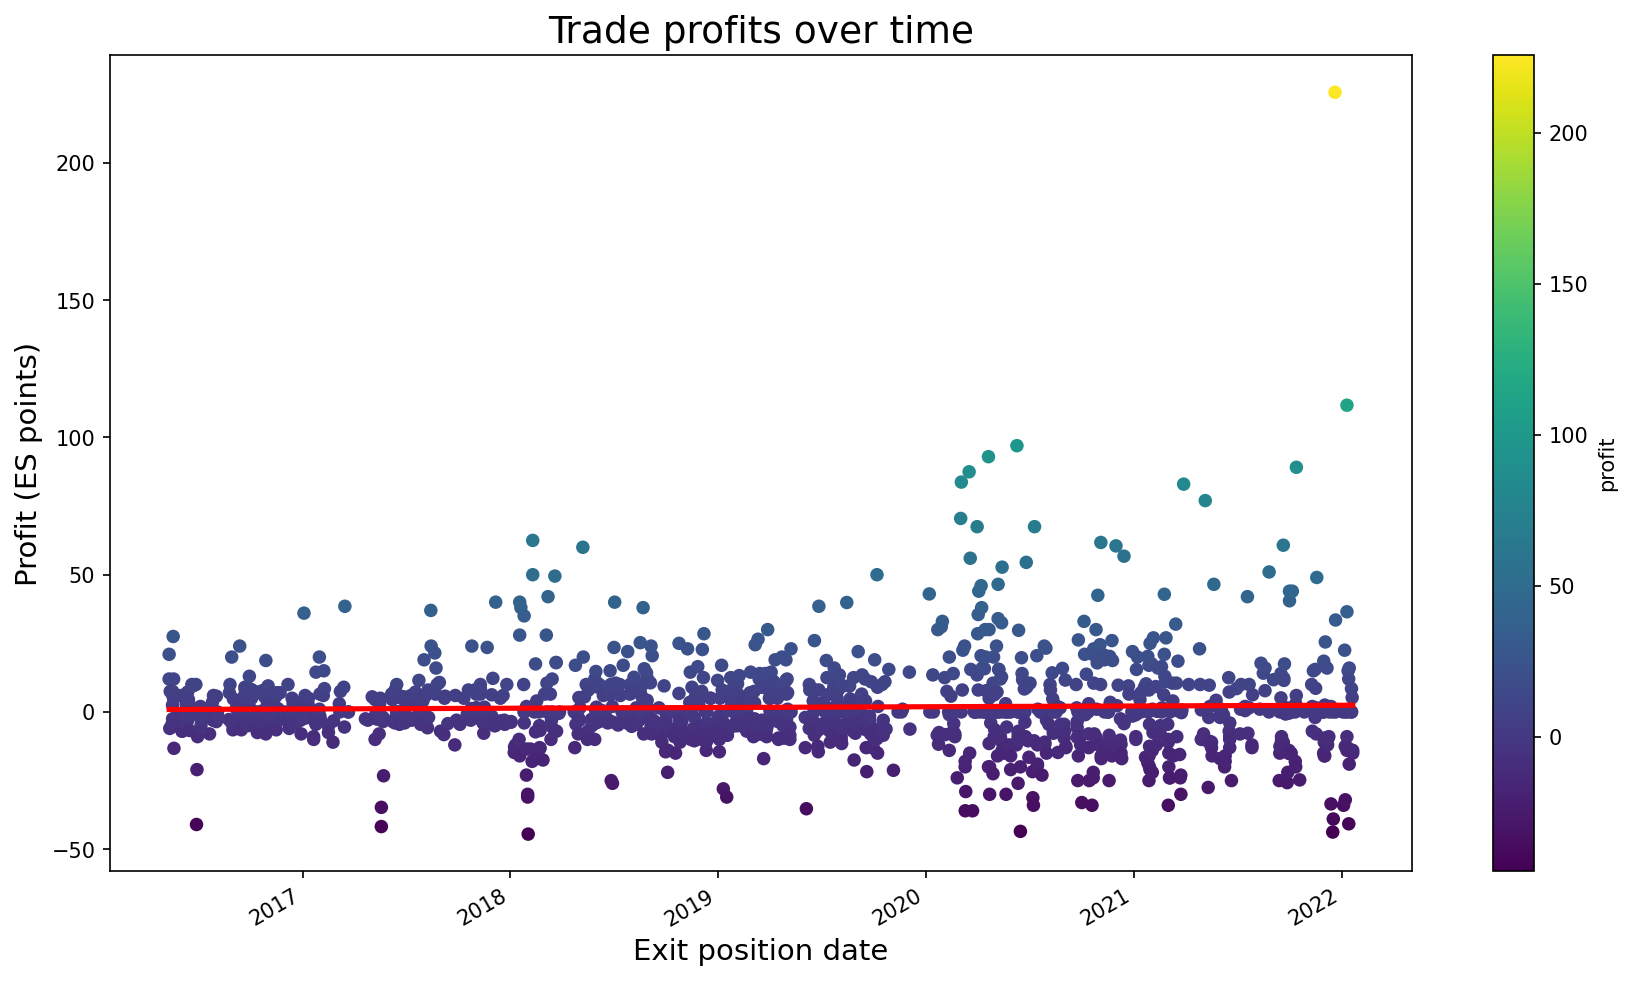

In [220]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=150)
df['ordinal_time'] = df.index.map(lambda x: x.toordinal())
slope, intercept, r, p, std_err = stats.linregress(df['ordinal_time'], df['profit'])

def myfunc(x):
    return slope * x + intercept

df['linear_regression'] = df['ordinal_time'].apply(lambda x: slope * x + intercept)
df.plot.scatter(x='time_entry', y='profit', c='profit', 
                colormap='viridis', ax=ax, s=30)
df['linear_regression'].plot(ax=ax, color='red', lw=2.5)

plt.xlabel('Exit position date', fontsize=14)
plt.ylabel('Profit (ES points)', fontsize=14)
plt.title("Trade profits over time", fontsize=18);

<p><b>3.2 Table of 10 best trades (biggest gain)</b></p>

In [221]:
best_trades = df.sort_values(by='profit', ascending=False)[:10].reset_index()
best_trades[['time_entry', 'time_exit', 'type', 'timeframe', 'entry_price', 'exit_price', 'profit']]

,time_entry,time_exit,type,timeframe,entry_price,exit_price,profit
0,2021-12-20 11:34:30,2021-12-31 07:56:47,long,swing,4522.0,4747.75,225.75
1,2022-01-10 10:57:39,2022-01-12 09:43:03,long,swing,4577.0,4688.75,111.75
2,2020-06-09 10:56:38,2020-06-11 09:58:06,short,swing,3212.5,3115.50,97.00
3,2020-04-20 10:27:47,2020-04-21 15:23:52,short,swing,2836.0,2743.00,93.00
4,2021-10-13 13:33:20,2021-10-15 14:33:04,long,swing,4353.0,4442.13,89.13
5,2020-03-17 10:06:02,2020-03-17 12:13:30,long,scalp,2382.0,2469.50,87.50
6,2020-03-03 18:25:13,2020-03-05 08:21:44,long,scalp,2990.0,3073.75,83.75
7,2021-03-29 10:33:28,2021-04-05 09:58:30,long,swing,3940.0,4023.00,83.00
8,2021-05-06 10:36:15,2021-05-07 10:15:46,long,swing,4151.0,4228.00,77.00
9,2020-03-02 14:44:16,2020-03-02 16:00:14,long,scalp,2989.0,3059.50,70.50


<p><b>3.3 Table of 10 worst trades (biggest loss)</b></p>

In [222]:
worst_trades = df.sort_values(by='profit')[:10].reset_index()
worst_trades[['time_entry', 'time_exit', 'type', 'timeframe', 'entry_price', 'exit_price', 'profit']]

,time_entry,time_exit,type,timeframe,entry_price,exit_price,profit
0,2018-02-01 12:00:25,2018-02-02 10:11:37,long,swing,2834.50,2790.00,-44.50
1,2021-12-16 11:26:06,2021-12-17 07:31:24,long,swing,4683.75,4640.00,-43.75
2,2020-06-15 13:18:43,2020-06-15 20:17:31,short,swing,3043.50,3087.00,-43.50
3,2017-05-19 09:53:23,2017-06-01 12:13:39,short,swing,2378.50,2420.25,-41.75
4,2016-06-28 14:59:45,2016-06-29 16:06:53,short,swing,2024.00,2065.00,-41.00
5,2022-01-13 15:17:43,2022-01-14 08:11:42,long,swing,4655.75,4615.00,-40.75
6,2021-12-17 10:43:00,2021-12-19 21:38:43,long,swing,4624.00,4585.00,-39.00
7,2020-03-23 10:44:51,2020-03-23 10:59:59,long,scalp,2269.00,2233.00,-36.00
8,2020-03-10 14:49:35,2020-03-11 08:29:52,long,swing,2824.00,2788.00,-36.00
9,2019-06-05 10:03:05,2019-06-06 16:16:46,short,swing,2815.00,2850.25,-35.25


<h2>4. Statistics based on time</h2>
<p>* Analysis of yearly, monthly, Mondays... </p>
<p>* Contains 3 tables on each category. Overall gain of points, average gain of points per trade and % of winning trades per certain time period</p>
<p>* Use category selection on the first page for more detailed analysis</p>
<p>* All stats are based on trade entry dates</p>
<p>* %profitable - how many % of trades resulted in point gain that was bigger than 0</p>

In [223]:
def table_plot(dt, col_name, index_name, bbox_i=None, drop=None, is_map=None):
    if col_name == '% profitable':
        dt['% profitable'] = calc_perc(dt['sum'], dt['count'])
        dt = dt.drop('sum', axis=1)
        dt.columns = ['num of entries', '% profitable']
        dt = dt[['% profitable', 'num of entries']]
    else:
        dt.columns = [col_name, 'num of entries']
        
    if is_map:
        dt.index = dt.index.map(is_map)
    dt.index.name = index_name
    dt[col_name] = dt[col_name].round(2)
    dt['num of entries'] = dt['num of entries'].astype(int)
    y_size = 6
    if len(dt) > 12:
        y_size += len(dt)*0.15
    fig, axs = plt.subplots(ncols=2, figsize=(16,y_size))
    to_plot = dt[col_name]
    if drop:
        to_plot = dt.drop(drop, axis=0, errors='ignore')[col_name]
    col_name = '% profitable (N[profit > 0] / N)' if col_name == '% profitable' else col_name
    to_plot.plot(ax=axs[0], marker='s', label=col_name)
    axs[0].legend();

    axs[1].axis('off')
    bbox = [0, 0, 1, 1]
    if bbox_i: bbox = bbox_i
    mpl_table = axs[1].table(cellText = dt.values, rowLabels = dt.index, bbox=bbox, colLabels=dt.columns)
    mpl_table.set_fontsize(14)

<p><b>4.1 Yearly - 2022, 2021, 2020...</p></b>

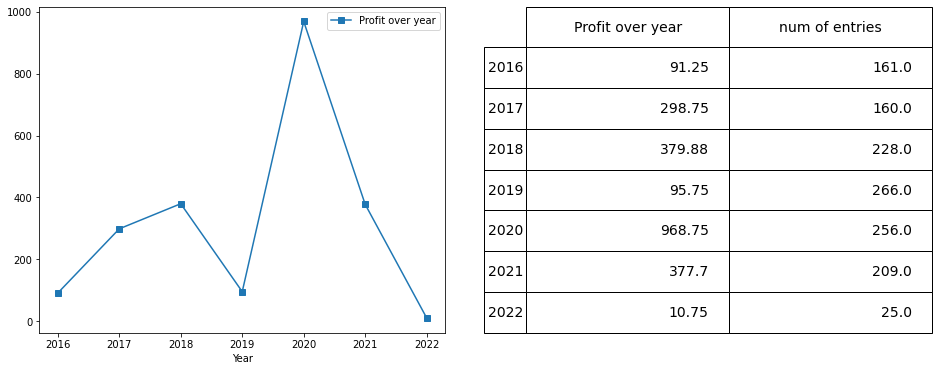

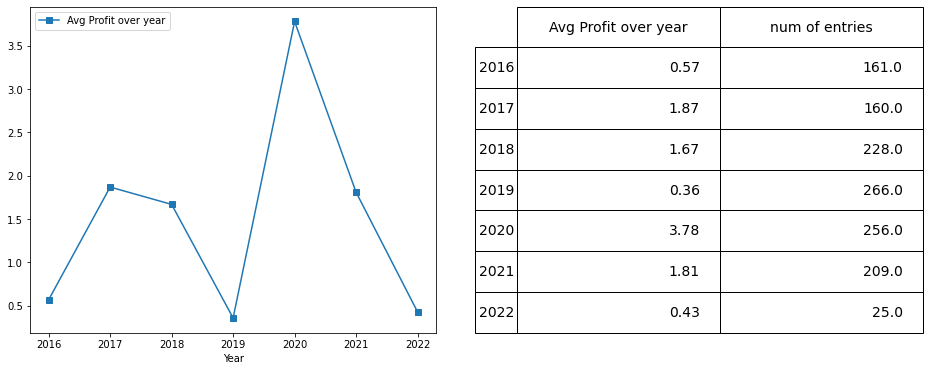

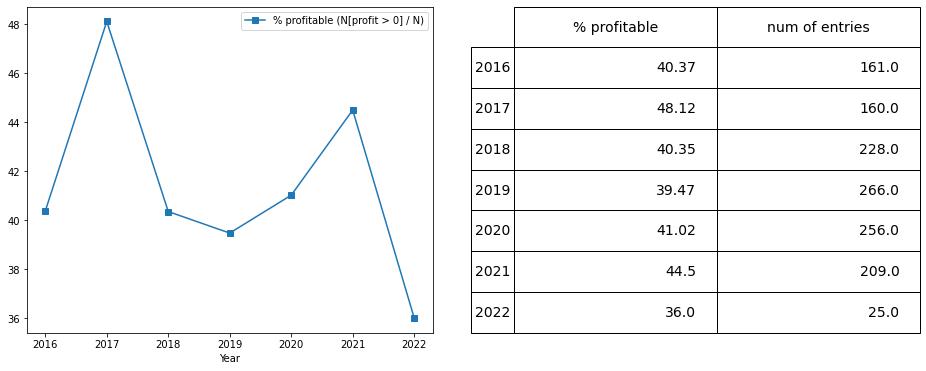

In [224]:
yearly = df.groupby(df['time_entry'].dt.year)['profit'].agg(['sum', 'count'])
yearly_avg = df.groupby(df['time_entry'].dt.year)['profit'].agg(['mean', 'count'])
yearly_perc = df.groupby(df['time_entry'].dt.year)['is_profit'].agg(['sum', 'count'])

table_plot(yearly, 'Profit over year', 'Year')
table_plot(yearly_avg, 'Avg Profit over year', 'Year')
table_plot(yearly_perc, '% profitable', 'Year')

<p><b>4.2 Monthly - Jan, Feb, Mar...</b></p>
<p>* Shows point gain each month grouped (all Januaries, all Feb... combined)</p>

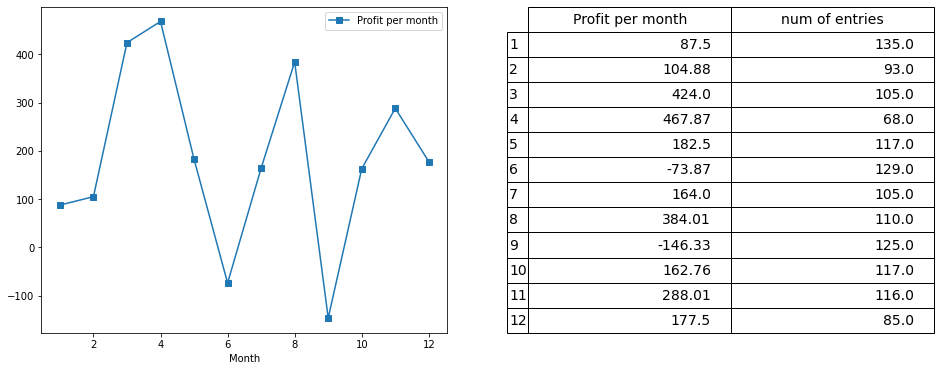

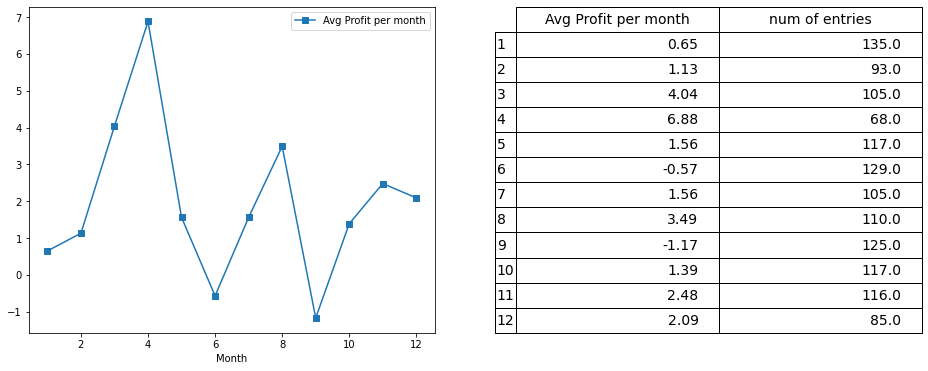

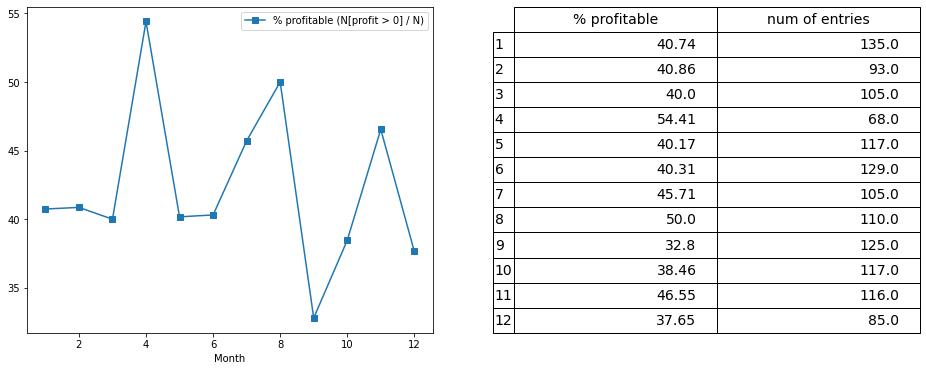

In [225]:
monthly = df.groupby(df['time_entry'].dt.month)['profit'].agg(['sum', 'count'])
monthly_avg = df.groupby(df['time_entry'].dt.month)['profit'].agg(['mean', 'count'])
monthly_perc = df.groupby(df['time_entry'].dt.month)['is_profit'].agg(['sum', 'count'])

table_plot(monthly, 'Profit per month', 'Month')
table_plot(monthly_avg, 'Avg Profit per month', 'Month')
table_plot(monthly_perc, '% profitable', 'Month')

<p><b>4.3 Weekly - Mon, Tue, Wed...<br /></b></p>
<p>Weekends were removed from graphs</p>

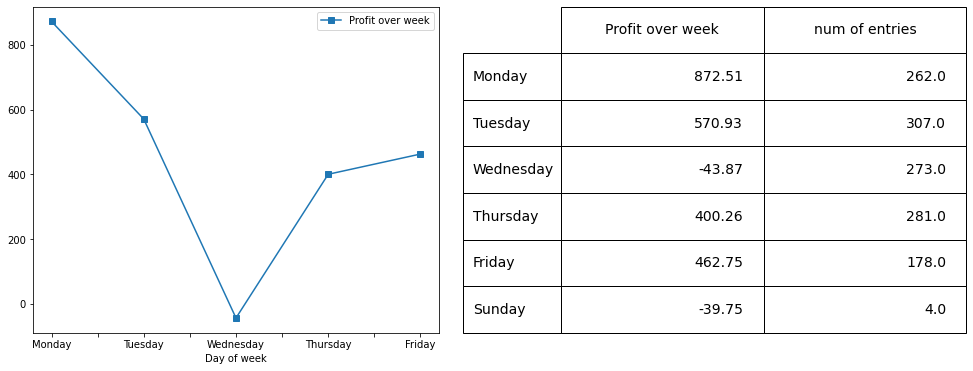

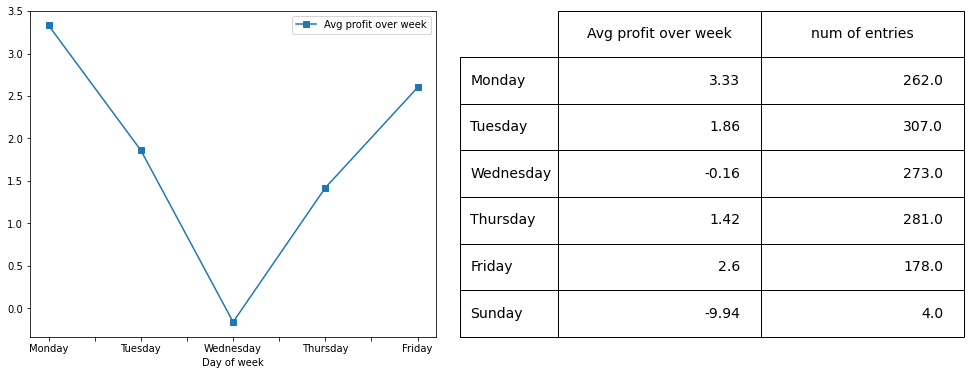

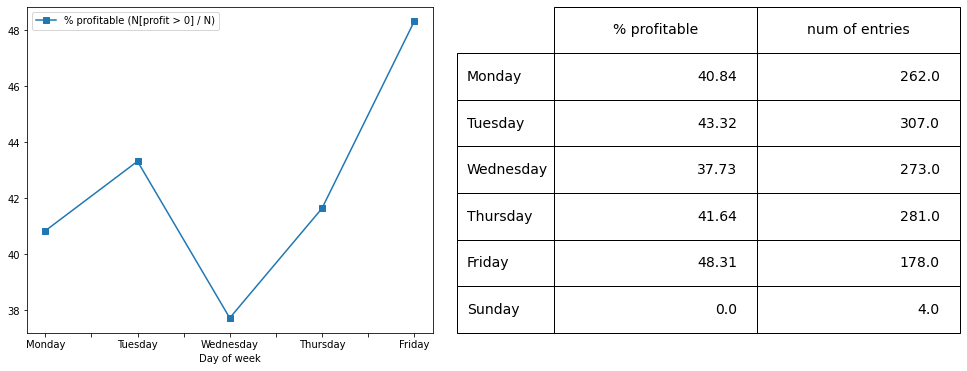

In [226]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekly = df.groupby(df['time_entry'].dt.dayofweek)['profit'].agg(['sum', 'count'])
weekly_avg = df.groupby(df['time_entry'].dt.dayofweek)['profit'].agg(['mean', 'count'])
weekly_perc = df.groupby(df['time_entry'].dt.dayofweek)['is_profit'].agg(['sum', 'count'])

table_plot(weekly, 'Profit over week', 'Day of week', [0.1, 0, 1, 1], ['Saturday', 'Sunday'], days)
table_plot(weekly_avg, 'Avg profit over week', 'Day of week', [0.1, 0, 1, 1], ['Saturday', 'Sunday'], days)
table_plot(weekly_perc, '% profitable', 'Day of week', [0.1, 0, 1, 1], ['Saturday', 'Sunday'], days)

<p><b>4.4 Daily - 1., 5., 22. ...</b></p>

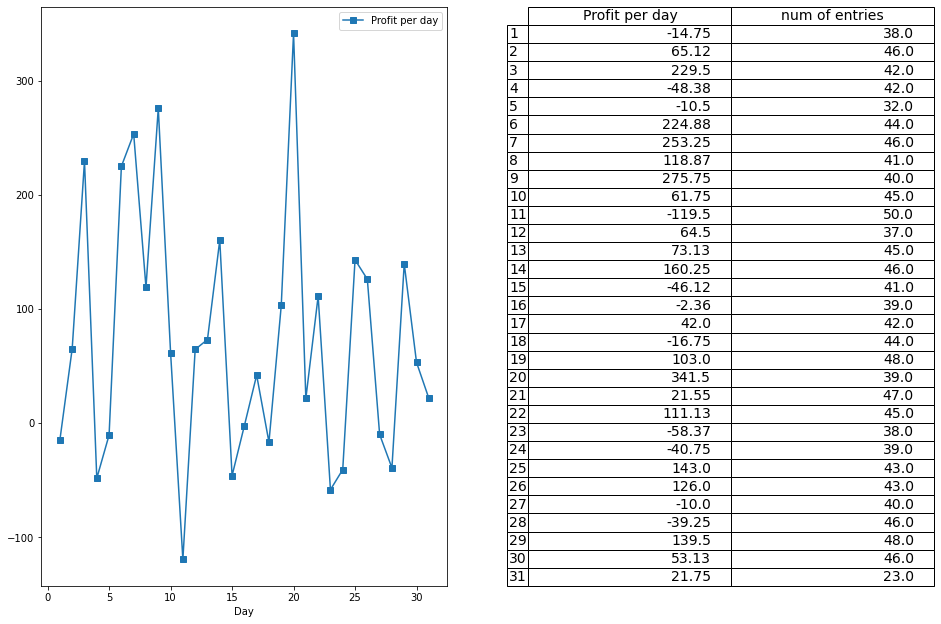

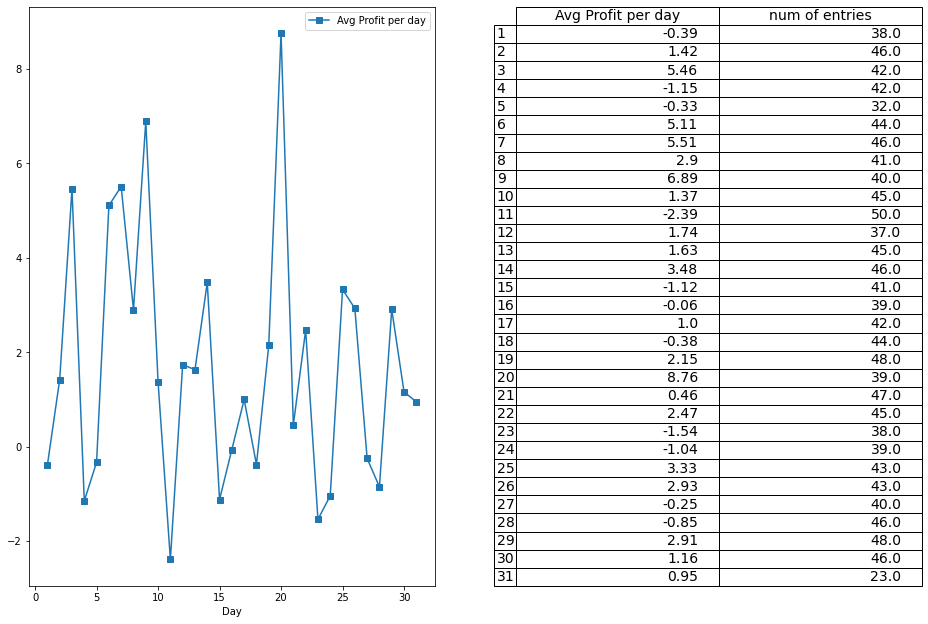

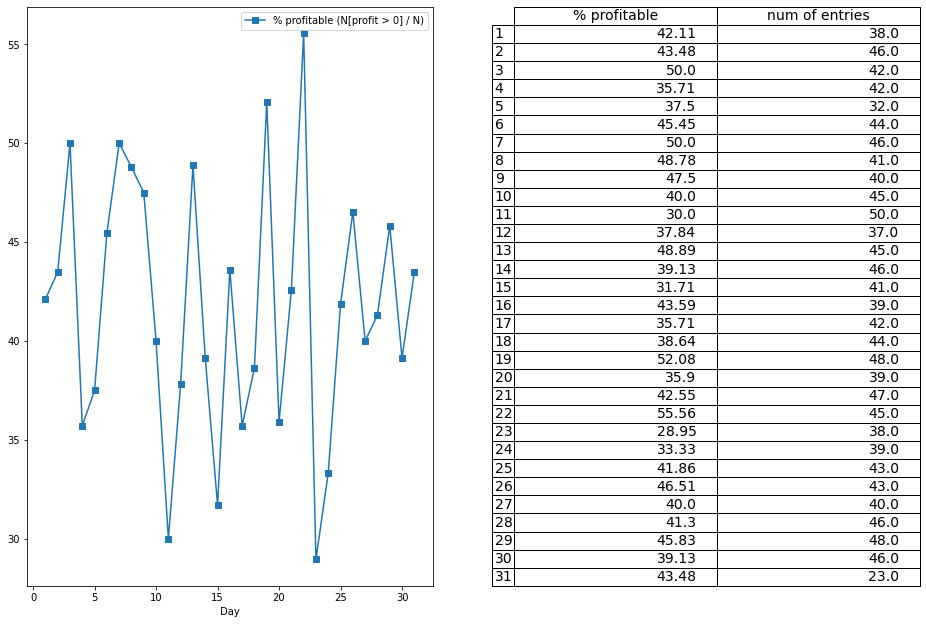

In [227]:
daily = df.groupby(df['time_entry'].dt.day)['profit'].agg(['sum', 'count'])
daily_avg = df.groupby(df['time_entry'].dt.day)['profit'].agg(['mean', 'count'])
daily_perc = df.groupby(df['time_entry'].dt.day)['is_profit'].agg(['sum', 'count'])

table_plot(daily, 'Profit per day', 'Day')
table_plot(daily_avg, 'Avg Profit per day', 'Day')
table_plot(daily_perc, '% profitable', 'Day')

<p><b>4.5 Hourly - 9am, 10am, 3pm...</b></p>
<p>* outside RTH hours were removed from graph</p>
<p>* shows at what hours entering the trade was the most profitable</p>
<p>* 10 means range 10:00 - 10:59</p>

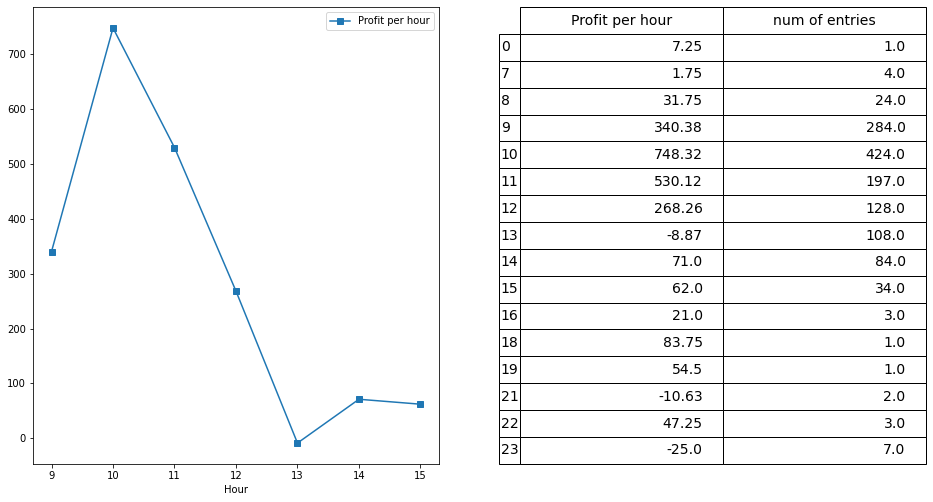

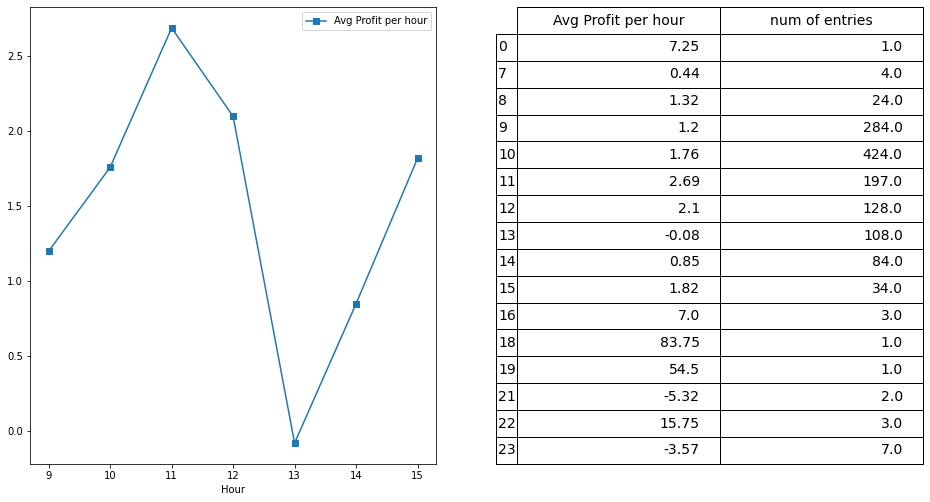

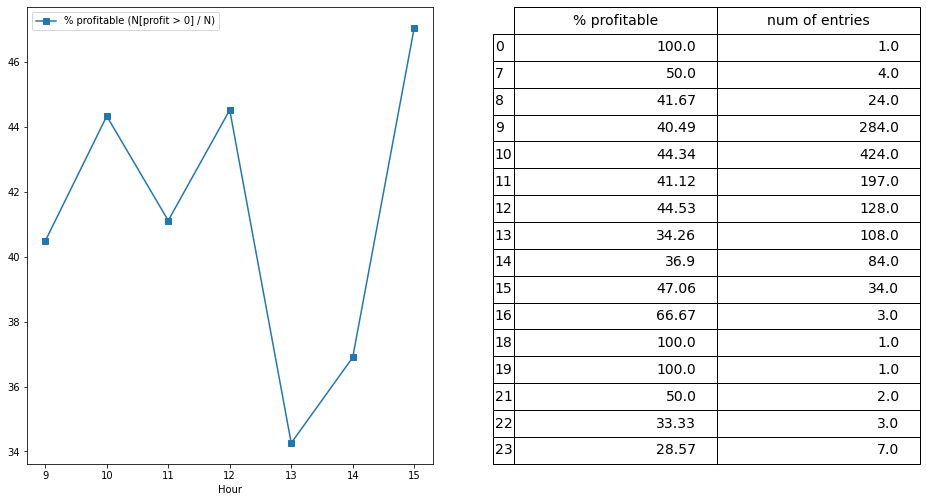

In [228]:
hourly = df.groupby(df['time_entry'].dt.hour)['profit'].agg(['sum', 'count'])
hourly_avg = df.groupby(df['time_entry'].dt.hour)['profit'].agg(['mean', 'count'])
hourly_perc = df.groupby(df['time_entry'].dt.hour)['is_profit'].agg(['sum', 'count'])

table_plot(hourly, 'Profit per hour', 'Hour', drop=[0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 18, 19, 21, 22, 23])
table_plot(hourly_avg, 'Avg Profit per hour', 'Hour', drop=[0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 18, 19, 21, 22, 23])
table_plot(hourly_perc, '% profitable', 'Hour', drop=[0, 1, 2, 3, 4, 5, 6, 7, 8, 16, 18, 19, 21, 22, 23])